In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
#Generate isotropic Gaussian blobs for clustering.
#it basically create cluster we will not use y 
#or _in place of y as unsupervised learning
#X,y =make_blobs(n_samples=500,n_features=2,centers=5,random_state=6)

In [10]:
X[:10]


array([[ -7.32786741,   4.23641465],
       [  1.12565931,   6.32088416],
       [ -0.49239887,  -5.28550826],
       [ -7.12432134,   6.16236021],
       [  2.38696269,   4.11331935],
       [  6.55519802, -10.28277104],
       [ -4.60484127,   4.27470475],
       [ -1.27010839,  -6.55718306],
       [  5.77989048,  -9.7922405 ],
       [ -7.72699176,  -9.47166311]])

In [11]:
X.shape

(500, 2)

In [5]:
#y[:10]

In [6]:
#y.shape

In [7]:
X ,_=make_blobs(n_samples=500,n_features=2,centers=5,random_state=10)
#centers is for how many groups we want

In [8]:
X[:10,0]

array([-7.32786741,  1.12565931, -0.49239887, -7.12432134,  2.38696269,
        6.55519802, -4.60484127, -1.27010839,  5.77989048, -7.72699176])

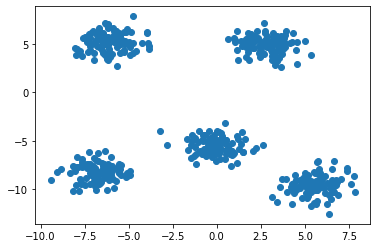

In [9]:
#X[:,feature1] ,X[:,feature2]
plt.scatter(X[:,0],X[:,1])
#five Cluster 
#we have to find labels for them for eg colour mapping 

In [12]:
#first we make from scratch then we do by sklearn

In [13]:
k=5

In [14]:
color=["red","maroon","blue","yellow","orange"]

In [15]:
#intialize clusters- centeroid by finding mean of data(centers) randomly
for i in range(k):
    center =np.random.randint(-8,10,size=(X.shape[1]))

In [16]:
#np.random.randint(-8,10,size=(X.shape[1],))
#or this can be written as
np.random.randint(-8,10,size=(2,))

array([-8, -3])

In [17]:
(X.shape[1],)

(2,)

In [18]:
clusters = {}

# step 1


In [85]:
# Initialize clusters

for i in range(k):
    center = np.random.randint(-8, 10, size= (X.shape[1],), )
    points = []
    
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    
    clusters[i] = cluster

In [86]:
clusters
#its a dictonary of all the clusters containing centers and color 
#now points is for the list of all points lying in its region 

{0: {'center': array([ 1, -1]), 'points': [], 'color': 'red'},
 1: {'center': array([ 7, -3]), 'points': [], 'color': 'maroon'},
 2: {'center': array([ 4, -4]), 'points': [], 'color': 'blue'},
 3: {'center': array([-7, -2]), 'points': [], 'color': 'yellow'},
 4: {'center': array([-7, -4]), 'points': [], 'color': 'orange'}}

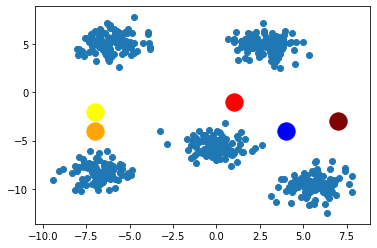

In [87]:

for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    plt.scatter(center[0], center[1], c=clusters[i]['color'], s=300, marker="o")
    #here we also taking color from the repective cluster's color
    
plt.scatter(X[:, 0], X[:, 1])
    
plt.show()

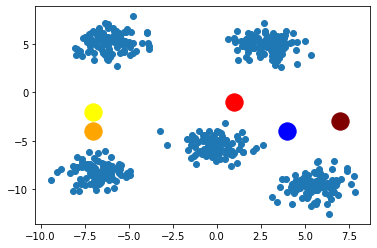

In [88]:
plt.scatter(X[:, 0], X[:, 1])

for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    plt.scatter(center[0], center[1], c=clusters[i]['color'], s=300, marker="o")
    #here we also taking color from the repective cluster's color
plt.show()

# Step2- Assign All points to nearest Cluster 

In [89]:
#it will iterate over all the points
#find the distance from all 5  =k and include which is nearest or less distance 

In [90]:
#Euclidean Distance b/w cluster pts and cluster center
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

In [91]:
def assignPointsToCluster(clusters, X):
    
    for ix in range(X.shape[0]):#iterate for all the examples
        distance_of_i = [] #we can make alist of five dist from cluster center
        
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w 
            #distance of the point with all the five (k) cluster crnters
            distance_of_i.append(d)
            
        cluster_to_choose = np.argmin(distance_of_i)
        #here we want min dist cluster center
        clusters[cluster_to_choose]['points'].append(X[ix])
        #here we are appending the cluster pts in pts list that are mini dist with center 

In [92]:
clusters[0]["center"] 

array([ 1, -1])

In [93]:
assignPointsToCluster(clusters, X)

In [94]:
clusters[3]
#cluster center associated with the nearest point !! 

{'center': array([-7, -2]),
 'points': [array([-7.32786741,  4.23641465]),
  array([-7.12432134,  6.16236021]),
  array([-4.60484127,  4.27470475]),
  array([-5.70068336,  6.31448715]),
  array([-6.09934226,  5.42784246]),
  array([-6.44966631,  6.14144988]),
  array([-6.69718292,  4.73157968]),
  array([-5.85542429,  5.19912575]),
  array([-7.66518952,  3.75182482]),
  array([-3.97311699,  6.25266666]),
  array([-6.14761625,  7.0313949 ]),
  array([-7.23972132,  6.05679934]),
  array([-6.14361949,  4.22019035]),
  array([-6.10065892,  4.15176595]),
  array([-5.19190142,  5.367266  ]),
  array([-6.56291653,  4.79204022]),
  array([-5.69601631,  6.08324441]),
  array([-7.36410858,  5.22916238]),
  array([-6.79051461,  4.77684156]),
  array([-5.56610328,  5.28627316]),
  array([-5.2586964 ,  6.26943127]),
  array([-6.85667908,  5.41998533]),
  array([-5.7233584 ,  6.34841371]),
  array([-7.1193392 ,  4.97456689]),
  array([-4.88064634,  6.21037476]),
  array([-5.24650322,  4.41951229]),


In [95]:
# #plotting clusters
# for kx in range(k):
#         cluster_ke_points = clusters[kx]['points']
#         cluster_ka_color = clusters[kx]['color']
#         cluster_ka_center = clusters[kx]['center']
        
#         cluster_ke_points = np.array(cluster_ke_points)
#         #bcz cluster pts are array of list but we want array so 
#         print(cluster_ke_points.shape)
#         if len(cluster_ke_points)>0:
#             #if no point is associated with cluster center
#             plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color)
        
#         plt.scatter(cluster_ka_center[0], cluster_ka_center[1], c='black', s=300, marker="*")

In [96]:
def plotclusters(clusters):
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        cluster_ka_color = clusters[kx]['color']
        cluster_ka_center = clusters[kx]['center']
        
        cluster_ke_points = np.array(cluster_ke_points)
        print(cluster_ke_points.shape)
        if len(cluster_ke_points)>0:
            plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color)
        
        plt.scatter(cluster_ka_center[0], cluster_ka_center[1], c='black', s=300, marker="*")

# Step - 3 Update centers to mean of all points

In [97]:
def updateCluster(clusters):
    
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        
        cluster_ke_points = np.array(cluster_ke_points)
        
        if len(cluster_ke_points)>0:
            new_center = np.mean(cluster_ke_points, axis=0) #axis is along rows so will 
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge 

In [100]:

cluster_ke_points

NameError: name 'cluster_ke_points' is not defined

(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)


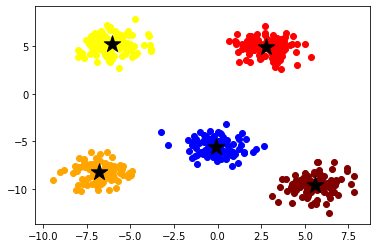

In [105]:
assignPointsToCluster(clusters, X)

plotclusters(clusters)

updateCluster(clusters)
#predictiion 

# Actual Outputs

In [106]:
#Actual 
#for seeing actual output u can check with this 
X,y =make_blobs(n_samples=500,n_features=2,centers=5,random_state=10)

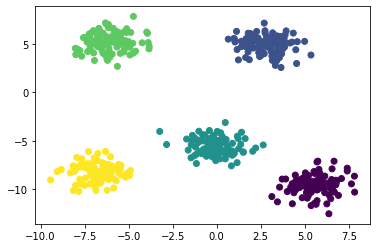

In [107]:
#y is label here 
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

# from Sklearn - KMeans++

In [108]:
from sklearn.cluster import KMeans

In [110]:
km = KMeans(n_clusters=5,init=k-means++)
# init='k-means++'
"""init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default=10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia."""

SyntaxError: invalid syntax (<ipython-input-110-84d3becbcc13>, line 1)